# Assignment 1: Text Mining

**Introduction:**
Happydb is a database 100,000+ crowd-sourced happy moments. In this analysis, we aim to find out whether people's relationships with other people played an important role in their happy moments and which specific relations do people tend to list while thinking of their happy moments.

In this analysis, we find people-specific words from every happy moment. We do that by using a "people dictionary", a lexicon which lists different words which are used to describe different relationships

Importing libraries:

In [1]:
import pandas as pd
import re

Loading the happy moments dataset:

In [132]:
happydb = pd.read_csv("happydb.csv")
happydb.head()

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection
2,27675,1936,24h,I went to the gym this morning and did yoga.,I went to the gym this morning and did yoga.,True,1,NaN,exercise
3,27676,206,24h,We had a serious talk with some friends of our...,We had a serious talk with some friends of our...,True,2,bonding,bonding
4,27677,6227,24h,I went with grandchildren to butterfly display...,I went with grandchildren to butterfly display...,True,1,NaN,affection


Loading the people-dictionary and modifying it such that all the different relationships in the lexicon are elements in a list called 'lexicon'.

In [133]:
lexicon1 = open("people-dict.csv")
lexicon = []
for word in lexicon1:
    word = word.replace("\n", "")
    lexicon.append(word)
#print(lexicon)

Searching through the lexicon in every happy moment to find whether the words in the lexicon are present. 'wordlist' is a list with all the words from the lexicon present in the happy moments:

In [136]:
count = 0
wordlist = []
for line in happydb['cleaned_hm']:
    for word in lexicon:
        my_regex = r".*" + r"\s" +word + r"\s"+ r".*"
        if re.search(my_regex, line):
            count += 1
            wordlist.append(word)
            #print(word)
            #print(line)
            break
print(count)

35733


Finding the proportion of people-specific happy moments with all the happy moments:

In [155]:
print("People mentioned other people in their happy moments " + str(round((count/happydb.shape[0])*100,2))+ "% of the time")

People mentioned other people in their happy moments 35.54% of the time


Duplicating 'wordlist': 

In [156]:
wordlist1 = wordlist

Clubbing relations and different words used to describe the same relation in one category:

In [157]:
wordlist1 = ['friend' if i in ["best friend", "bestfriend", "bestfriends", "bestie", "besties",\
                              "bff" , "bffs", "buddies", "buddy", "close friend", "dudes", \
                              "friends", "friend", "good friend", "guy", "guys", "fellas", "fella", "bloke",\
                               "lad", "blokes" , "lads", "girlfriends", "boyfriends", "pals"] else i for i in wordlist1]

wordlist1 = ['spouse' if i in ["fiance", "fiancee", "fiancée", "fiancé", "hubby", "husband", "wife", \
                              "ex-husband", "ex-wife"] else i for i in wordlist1]

wordlist1 = ['romantic partner' if i in ["bae", "bf", "boyfriend", "ex-boyfriend", "ex-girlfriend", "my ex", "gf",\
                                         "girlfriend", "lover", "partner", "partners",\
                                         "love of my life"] else i for i in wordlist1]

wordlist1 = ['sibling' if i in ["bro", "brother", "brothers", "elder brother", "older brother",\
                               "sister", "sisters", "sibling", "sis", "siblings", "twin brother",\
                               "sister-in-law", "sisters-in-law", "younger brother", \
                                "brother-in-law"] else i for i in wordlist1]

wordlist1 = ['kids' if i in ["baby", "babies","kids", "boy", "boys", "child", "children", "daughter", "daughters",\
                                "elder son", "eldest", "eldest son", "girl", "girls", "newborn", "newborns",\
                            "oldest son", "only son", "second son", "son", "sons", "stepson", \
                             "toddler", "toddlers", "only daughter", "eldest daughter", \
                             "youngest child", "youngest daughter", "eldest child", "kiddos", "kid", \
                            "stepdaughter", "daughter-in-law", "infant", "infants", "son-in-law",\
                            "younger son", "youngest son", "only child"] else i for i in wordlist1]

wordlist1 = ['parents' if i in ["dad", "daddy", "dads", "father", "father-in-law", "folks",\
                               "mama", "mamma", "mom", "momma", "mommy", "moms", "mother", "mother-in-law", "mothers",\
                                "mum", "papa", "pappa","parent","parents", "step-father",\
                                "step-mother", "stepfather", "stepmother", "fathers", "stepdad",\
                               "mommies", "stepmom", "mummy"] else i for i in wordlist1]

wordlist1 = ['family' if i in ["aunt", "auntie", "aunties", "aunts", "aunty","cousin", "cousins",\
                               "neice", "nephew", "nephews", "niece", "nieces", "uncle", "uncles", "families",\
                               "family", "in-law", "in-laws", "inlaws"] else i for i in wordlist1]

wordlist1 = ['grandparents' if i in ["grandfather","grandfathers","grandma","grandmas","grandmother",\
                                     "grandmothers","grandpa","grandparents", "grannies", "granny"] else i for i in wordlist1]

wordlist1 = ['great-grandparents' if i in ["great-grandfather", "great-grandmother", \
                                           "great-grandparents"] else i for i in wordlist1]

wordlist1 = ['grandkids' if i in ["grand-daughter", "grandaughter", "grandchild", "grandchildren",\
                                  "granddaughter", "granddaughters", "grandson", "grandsons"] else i for i in wordlist1]

wordlist1 = ['great-grandkids' if i in ["great-grandson", "great-grandchildren", \
                                           "great-granddaughter"] else i for i in wordlist1]

In [158]:
from pandas import DataFrame
peopledf = DataFrame(wordlist, columns=['Relation'])
peopledf1 = DataFrame(wordlist1, columns=['Relation'])

Creating a data frame with all the words from the lexicon present in the happy moments and their frequency:

In [159]:
frequencydf1 = DataFrame(peopledf1['Relation'].value_counts().reset_index())
frequencydf1 = frequencydf1.rename(columns = {'index': 'Relationship', 'Relation': 'Frequency_Count'})

Creating a bar graph of frequency of relationship caregory:

<AxesSubplot:xlabel='Relationship'>

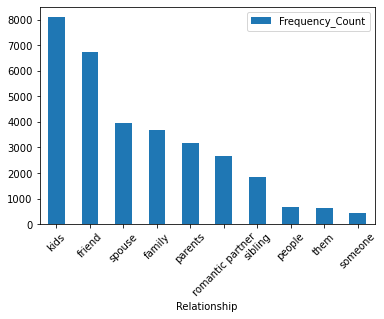

In [160]:
frequencydf1.head(10).plot.bar(x='Relationship', y='Frequency_Count', rot=45)

In [166]:
frequencydf1['Percent_frequency'] = (frequencydf1['Frequency_Count']/count)*100
frequencydf1.head(10)

,Relationship,Frequency_Count,Percent_frequency
0,kids,8105,22.682115
1,friend,6716,18.794951
2,spouse,3973,11.118574
3,family,3681,10.301402
4,parents,3189,8.924524
5,romantic partner,2646,7.404920
6,sibling,1857,5.196877
7,people,666,1.863823
8,them,633,1.771472
9,someone,432,1.208967


**Results:**
In all of the happy moments, different relations were mentioned around 35% of the time.

Of the total moments were mentioned, people mentioned their kids 22.68% of the time or 8105 times. The relation that was prominent after was that of a friend. It was mentioned 6716 times or 18.79% of the time. Spouse was followed with a mention of 11.19% of the times or 3973 times. 

It can be seen that people consider significant relations in their life pretty close to their heart and think of their immediate or extended family or friends in their happy moments.



**Learnings:**
*In this code, I chose to include a break statement in the innermost loop. My code right now picks the first word from the lexicon that is present in the happy moment and exits the loop. I did it because of memory issues. Since it is a huge data set, looping without a break statement was causing memory errors. It is possible that a person's happy moment includes more than one relation, however I was not able to encapsulate that.*